# Data Visualization on Amazon Top Best Selling Books Dataset 

In [1]:
import pandas as pd

file_path = r"C:\Users\DELL\Downloads\bestsellers with categories.csv"
books_df = pd.read_csv(file_path)

books_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# Basic Data Exploration

In [2]:
# Summary statistics
print(books_df.describe())

# Check for missing values
print(books_df.isnull().sum())


       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


#  Visualization Examples

#  a. Distribution of Ratings :

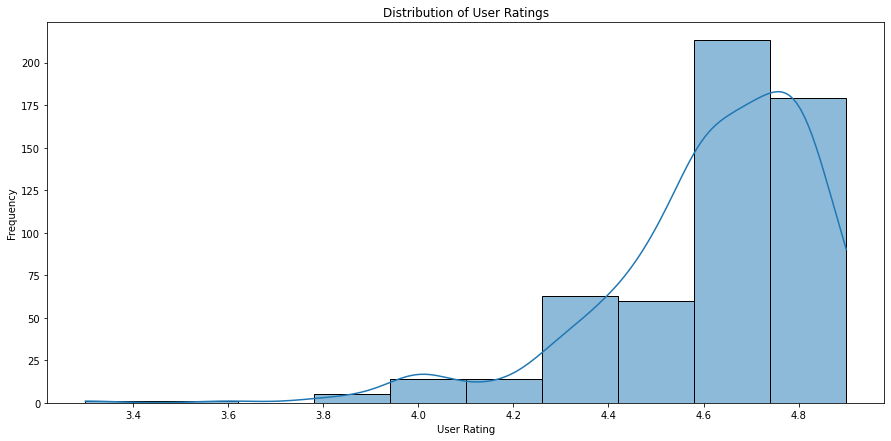

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.histplot(books_df['User Rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()


#  b. Number of Books by Genre :

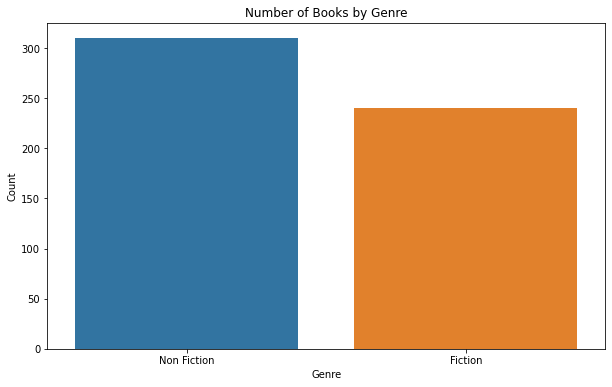

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=books_df)
plt.title('Number of Books by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


# c. Average Price by Genre:

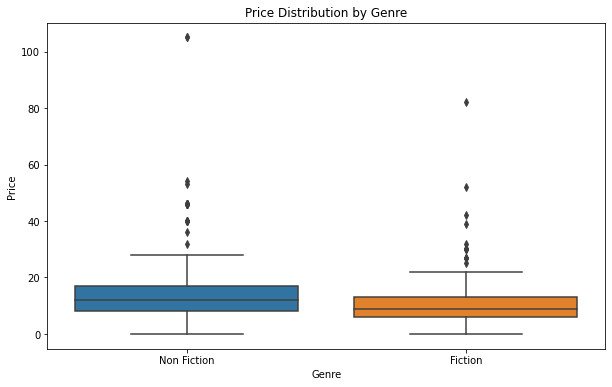

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Price', data=books_df)
plt.title('Price Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.show()


# d. Top 10 Most Reviewed Books : 

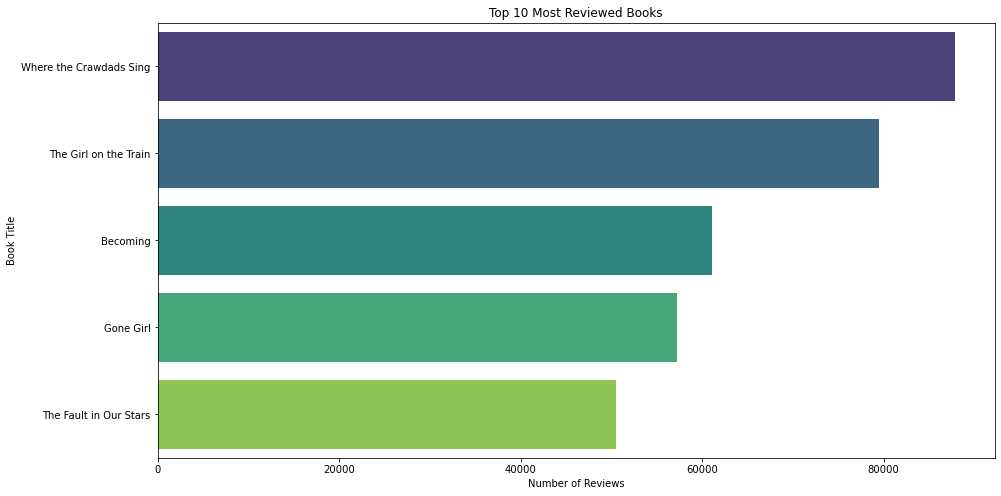

In [13]:
top_10_reviewed = books_df.nlargest(10, 'Reviews')

plt.figure(figsize=(15, 8))
sns.barplot(x='Reviews', y='Name', data=top_10_reviewed, palette='viridis')
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.show()


#  e. Distribution of Reviews :

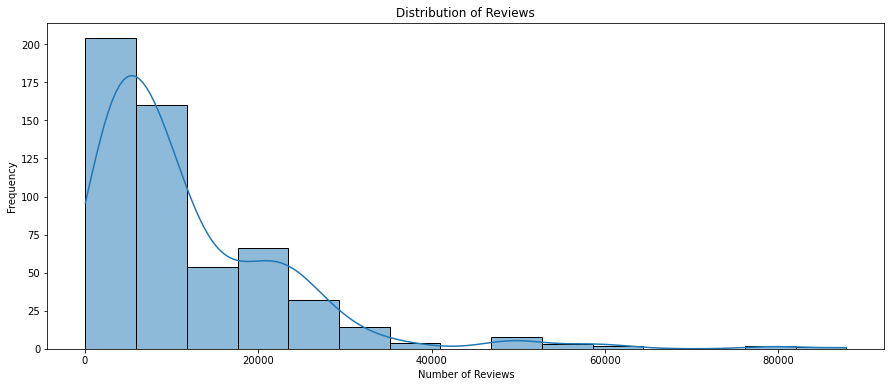

In [14]:
plt.figure(figsize=(15, 6))
sns.histplot(books_df['Reviews'], bins=15, kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


#  f. Top 10 Most Expensive Books :

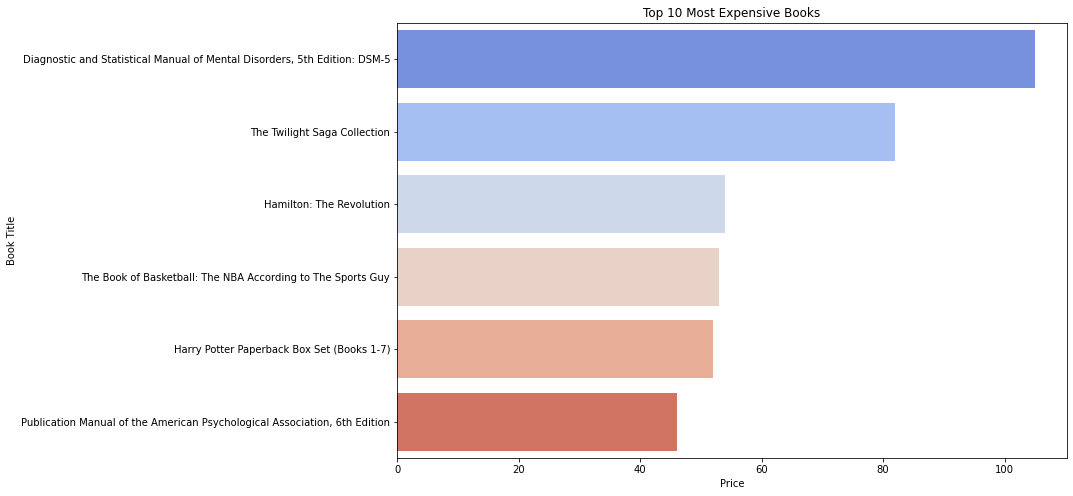

In [15]:
top_10_expensive = books_df.nlargest(10, 'Price')

plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Name', data=top_10_expensive, palette='coolwarm')
plt.title('Top 10 Most Expensive Books')
plt.xlabel('Price')
plt.ylabel('Book Title')
plt.show()


# g. Average User Rating by Author :

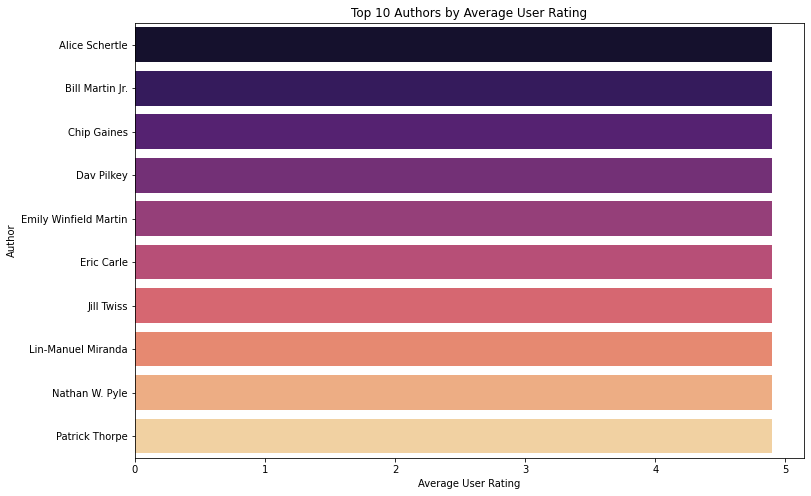

In [16]:
avg_rating_author = books_df.groupby('Author')['User Rating'].mean().reset_index()
top_authors = avg_rating_author.nlargest(10, 'User Rating')

plt.figure(figsize=(12, 8))
sns.barplot(x='User Rating', y='Author', data=top_authors, palette='magma')
plt.title('Top 10 Authors by Average User Rating')
plt.xlabel('Average User Rating')
plt.ylabel('Author')
plt.show()


#  h. Price vs. Reviews :

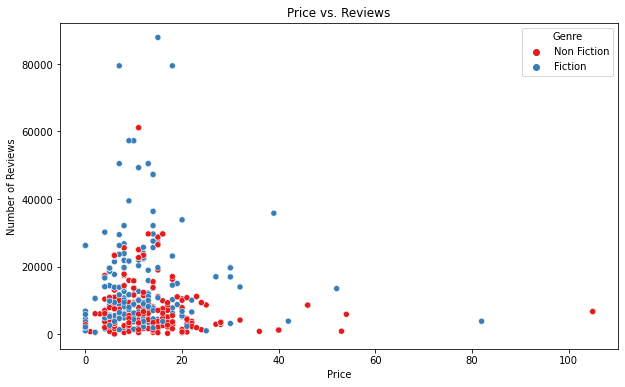

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=books_df, hue='Genre', palette='Set1')
plt.title('Price vs. Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.legend(title='Genre')
plt.show()


# i. Genre Distribution in Top 50 Bestsellers :

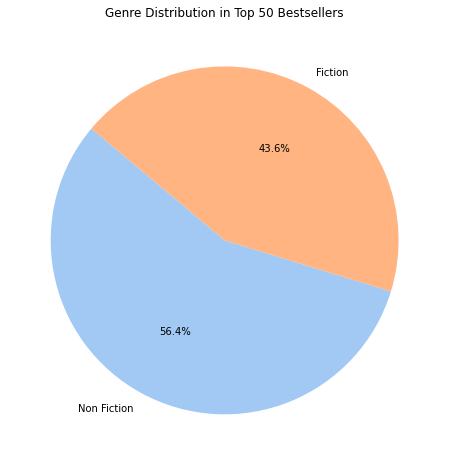

In [18]:
genre_counts = books_df['Genre'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Genre Distribution in Top 50 Bestsellers')
plt.show()
